# `map` vs `apply`

Do you know the difference between the **`map`** and **`apply`** Series methods? See this [Stack Overflow link](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas).

# Primary usage of `map` method
As the name implies, **`map`** can literally map one value to another (i.e. elementwise) in a Series. Pass it a dictionary (or another Series). Let's see an example:

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series(np.random.randint(1, 7, 10))
s

0    2
1    6
2    2
3    6
4    4
5    1
6    2
7    6
8    4
9    3
dtype: int64

`map` can take a dictionary or mapping table.

In [3]:
d = {1:'odd', 2:'even', 3:'odd', 4:'even', 5:'odd', 6:'even'}

In [4]:
s.map(d)

0    even
1    even
2    even
3    even
4    even
5     odd
6    even
7    even
8    even
9     odd
dtype: object

Works the same if you use a `Series`, where indices are the keys.

In [5]:
s1 = pd.Series(d)
s1

1     odd
2    even
3     odd
4    even
5     odd
6    even
dtype: object

In [6]:
s.map(s1)

0    even
1    even
2    even
3    even
4    even
5     odd
6    even
7    even
8    even
9     odd
dtype: object

#### `map` example with more data
Let's map the values of 1 million integers ranging from 1 to 100 to 'even/odd' strings

In [7]:
n = 1000000 # 1 million
s = pd.Series(np.random.randint(1, 101, n))
s.head()

0     1
1    90
2    56
3    60
4    15
dtype: int64

Create the mapping

In [8]:
d = {i: 'odd' if i % 2 else 'even' for i in range(1, 101)}
print(d)

{1: 'odd', 2: 'even', 3: 'odd', 4: 'even', 5: 'odd', 6: 'even', 7: 'odd', 8: 'even', 9: 'odd', 10: 'even', 11: 'odd', 12: 'even', 13: 'odd', 14: 'even', 15: 'odd', 16: 'even', 17: 'odd', 18: 'even', 19: 'odd', 20: 'even', 21: 'odd', 22: 'even', 23: 'odd', 24: 'even', 25: 'odd', 26: 'even', 27: 'odd', 28: 'even', 29: 'odd', 30: 'even', 31: 'odd', 32: 'even', 33: 'odd', 34: 'even', 35: 'odd', 36: 'even', 37: 'odd', 38: 'even', 39: 'odd', 40: 'even', 41: 'odd', 42: 'even', 43: 'odd', 44: 'even', 45: 'odd', 46: 'even', 47: 'odd', 48: 'even', 49: 'odd', 50: 'even', 51: 'odd', 52: 'even', 53: 'odd', 54: 'even', 55: 'odd', 56: 'even', 57: 'odd', 58: 'even', 59: 'odd', 60: 'even', 61: 'odd', 62: 'even', 63: 'odd', 64: 'even', 65: 'odd', 66: 'even', 67: 'odd', 68: 'even', 69: 'odd', 70: 'even', 71: 'odd', 72: 'even', 73: 'odd', 74: 'even', 75: 'odd', 76: 'even', 77: 'odd', 78: 'even', 79: 'odd', 80: 'even', 81: 'odd', 82: 'even', 83: 'odd', 84: 'even', 85: 'odd', 86: 'even', 87: 'odd', 88: 'eve

In [9]:
s.map(d).head(10)

0     odd
1    even
2    even
3    even
4     odd
5     odd
6    even
7    even
8     odd
9     odd
dtype: object

### Exercise
<span style="color:green; font-size:16px">Can you use the **`apply`** method to do the same thing? Time the difference between the **`apply`** and **`map`**.</span>

In [12]:
# your code here
evenodd = lambda x: 'even' if x%2 == 0 else 'odd'
s.apply(evenodd)

0          odd
1         even
2         even
3         even
4          odd
5          odd
6         even
7         even
8          odd
9          odd
10         odd
11        even
12         odd
13        even
14        even
15        even
16        even
17         odd
18        even
19        even
20         odd
21        even
22        even
23         odd
24         odd
25         odd
26        even
27         odd
28        even
29        even
          ... 
999970    even
999971    even
999972     odd
999973     odd
999974    even
999975     odd
999976     odd
999977    even
999978    even
999979     odd
999980     odd
999981    even
999982     odd
999983    even
999984     odd
999985     odd
999986     odd
999987    even
999988     odd
999989    even
999990     odd
999991     odd
999992     odd
999993    even
999994    even
999995     odd
999996     odd
999997    even
999998     odd
999999     odd
Length: 1000000, dtype: object

### `map` and `apply` can both take functions
Unfortunately both **`map`** and **`apply`** can accept a function that gets implicitly passed each value in the Series. The result of each operation is the exact same.

In [ ]:
a = s.apply(lambda x: 'odd' if x % 2 else 'even')
b = s.map(lambda x: 'odd' if x % 2 else 'even')

a.equals(b)

This dual functionality of **`map`** confuses users. It can accept a dictionary **and** it can also accept a function.

### Suggestion: only use `map` for literal mapping
It makes more sense to me that the **`map`** method only be used for one purpose and this is to map each value in a Series from one value to another with a dictionary or a Series.

### Use `apply` only for functions
**`apply`** must take a function and has more options than **`map`** when taking a function so it should be used when you want to apply a function to each value in a Series. There is no difference in speed between the two.

# Vectorized if-then-else with NumPy `where`
The NumPy **`where`** function provides us with a vectorized if-then-else that is very fast. Let's convert the Series again to 'even/odd' strings.

In [13]:
s = pd.Series(np.random.randint(1, 101, n))

In [14]:
np.where(s % 2, 'odd', 'even')

array(['even', 'even', 'odd', ..., 'even', 'even', 'even'],
      dtype='<U4')

In [15]:
%timeit np.where(s % 2, 'odd', 'even')

23.3 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Exercise
<span style="color:green; font-size:16px">Convert the values from 1-33 to 'low', 34-67 to 'medium' and the rest 'high'.</span>

In [16]:
# your code here
np.where(s <= 33, 'low', np.where(s <= 67, 'medium', 'high'))

array(['low', 'low', 'high', ..., 'high', 'high', 'low'],
      dtype='<U6')

### There is a DataFrame/Series  `where` method
There is a DataFrame/Series **`where`** method but it works differently. You must pass it a boolean DataFrame/series and **it will preserve all the values that are True. The other values will by default be converted to missing, but you can specify a specific number as well**.

In [17]:
s.where(s > 50).head(10)

0     NaN
1     NaN
2    91.0
3     NaN
4    65.0
5     NaN
6    98.0
7    90.0
8     NaN
9    95.0
dtype: float64

In [18]:
s.where(s > 50, other=-1).head(10)

0    -1
1    -1
2    91
3    -1
4    65
5    -1
6    98
7    90
8    -1
9    95
dtype: int64

# Do we really need `apply`?
As we saw from this last example, we could eliminate the need for the **`apply`** method. Most examples of code that use **`apply`** do not actually need it.

### `apply` doesn't really do anything
By itself, the **`apply`** method doesn't really do anything. 
* For Series, it iterates over every single value and passes that value to a function that you must pass to **`apply`**. 
* For a DataFrame, it iterates over each column or row as a Series and calls your passed function on that Series

Let's see a simple example of **`apply`** used to multiply each value of a Series by 2:

In [19]:
s = pd.Series(np.random.randint(1, 101, n))

In [20]:
s.apply(lambda x: x * 2).head()

0    156
1     78
2     56
3     30
4     86
dtype: int64

In [21]:
(s * 2).head()

0    156
1     78
2     56
3     30
4     86
dtype: int64

In [22]:
%timeit s.apply(lambda x: x * 2)

423 ms ± 82.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit s * 2

2.73 ms ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Use vectorized solution whenever possible
As you can see, the solution with **`apply`** was more than 2 orders of magnitude slower than the vectorized solution. Even a for-loop can be faster than **`apply`**.

In [24]:
%timeit pd.Series([v * 2 for v in s])

233 ms ± 4.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


I like to call **`apply`** the **method of last resort**. There is almost rarely a reason to use it over other methods. Pandas and NumPy both provide a tremendous amount of functionality that cover nearly everything you need to do. 

Always use pandas and NumPy methods first before anything else.

### Use-cases for `apply` on a Series
When there is no vectorized implementation in pandas, numpy or other scientific library, then you can use **`apply`**.

A simple example (that's not too practical) is finding the underlying data type of each value in a Series.

In [25]:
s = pd.Series(['a', {'TX':'Texas'}, 99, (0, 5)])
s

0                  a
1    {'TX': 'Texas'}
2                 99
3             (0, 5)
dtype: object

In [26]:
s.apply(type)

0      <class 'str'>
1     <class 'dict'>
2      <class 'int'>
3    <class 'tuple'>
dtype: object

### Using `apply` on a DataFrame
By default **`apply`** will call the passed function on each individual column on a DataFrame. The column will be passed to the function as a Series.

In [27]:
df = pd.DataFrame(np.random.rand(100, 5), columns=['a', 'b', 'c', 'd', 'e'])
df.head()

,a,b,c,d,e
0,0.692039,0.648447,0.413024,0.102416,0.312235
1,0.902508,0.662009,0.533453,0.274063,0.452927
2,0.468143,0.357509,0.489235,0.559642,0.933750
3,0.268355,0.922740,0.530136,0.773971,0.853371
4,0.453719,0.941021,0.772391,0.623039,0.680093


In [28]:
df.apply(lambda s: s.max())

a    0.999849
b    0.941021
c    0.986408
d    0.989046
e    0.966748
dtype: float64

We can change the direction of the operation by seting the **`axis`** parameter to **`1`** or **`columns`**

In [29]:
df.apply(lambda s: s.max(), axis='columns').head(10)

0    0.692039
1    0.902508
2    0.933750
3    0.922740
4    0.941021
5    0.827322
6    0.921645
7    0.960150
8    0.907477
9    0.730209
dtype: float64

#### Never actually perform these operations when a DataFrame method exists
Let's fix these two methods and time their differences

In [30]:
df.max()

a    0.999849
b    0.941021
c    0.986408
d    0.989046
e    0.966748
dtype: float64

In [31]:
df.max(axis='columns').head(10)

0    0.692039
1    0.902508
2    0.933750
3    0.922740
4    0.941021
5    0.827322
6    0.921645
7    0.960150
8    0.907477
9    0.730209
dtype: float64

In [32]:
%timeit df.apply(lambda s: s.max())

661 µs ± 8.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%timeit df.max()

120 µs ± 2.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%timeit df.apply(lambda s: s.max(), axis='columns')

7.79 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%timeit df.max(axis='columns')

133 µs ± 8.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


5x and 70x faster and much more readable code

### Infected by the documentation
Unfortunately, pandas official documentation is littered with examples that don't need **`apply`**. Can you fix the following 2 misuses of **`apply`** [found here](http://pandas.pydata.org/pandas-docs/stable/10min.html#apply).



### Exercise
<span style="color:green; font-size:16px">Make the following idiomatic - the clue is that if you are passing in a `numpy` function and using apply, chances are in `pandas` function they will have the same function. </span>

In [36]:
df.apply(np.cumsum).head()

,a,b,c,d,e
0,0.692039,0.648447,0.413024,0.102416,0.312235
1,1.594548,1.310456,0.946477,0.376479,0.765162
2,2.062691,1.667965,1.435712,0.936120,1.698912
3,2.331046,2.590705,1.965849,1.710092,2.552282
4,2.784765,3.531726,2.738239,2.333131,3.232376


In [38]:
# your code here
df.cumsum().head()

,a,b,c,d,e
0,0.692039,0.648447,0.413024,0.102416,0.312235
1,1.594548,1.310456,0.946477,0.376479,0.765162
2,2.062691,1.667965,1.435712,0.936120,1.698912
3,2.331046,2.590705,1.965849,1.710092,2.552282
4,2.784765,3.531726,2.738239,2.333131,3.232376


### Exercise
<span style="color:green; font-size:16px">Make the following idiomatic</span>

In [39]:
df.apply(lambda x: x.max() - x.min())

a    0.990497
b    0.939192
c    0.983833
d    0.981455
e    0.962501
dtype: float64

In [40]:
# your code here
df.max() - df.min()

a    0.990497
b    0.939192
c    0.983833
d    0.981455
e    0.962501
dtype: float64

### `apply` with `axis=1` is the slowest operation you can do in pandas
If you call **`apply`** with **`axis=1`** or identically with **`axis='columns'`** on a DataFrame, pandas will iterate row by row to complete your operation. Since there are almost always more rows than columns, this will be extremely slow.

### Exercise
<span style="color:green; font-size:16px">Add a column named **`distance`** to the following DataFrame that computes the euclidean distance between points **`(x1, y1)`** and **`(x2, y2)`**. Calculate it once with **`apply`** and again idiomatically using vectorized operations. Time the difference between them.</span>

In [41]:
# run this first
df = pd.DataFrame(np.random.randint(0, 20, (100000, 4)), 
                  columns=['x1', 'y1', 'x2', 'y2'])
df.head()

,x1,y1,x2,y2
0,9,6,10,4
1,4,9,12,12
2,7,7,11,5
3,12,0,4,15
4,8,4,16,3


In [46]:
# your code here
distance = lambda r: np.sqrt((r['x1']-r['x2'])**2+(r['y1']-r['y2'])**2)
%timeit df.apply(distance, axis=1)
%timeit np.sqrt( (df['x1']-df['x2'])**2 + (df['y1']-df['y2'])**2 )

5.88 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.03 ms ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Use-cases for apply on a DataFrame

**Case 1**: For methods that only exist for Series, you might need to use **`apply`**. But note that `DataFrames` and `Series` have nearly all of the their methods in common.

In [47]:
weather = pd.DataFrame({'Houston': ['rainy', 'sunny', 'sunny', 'cloudy', 'rainy', 'sunny'],
                        'New York':['sunny', 'sunny', 'snowy', 'snowy', 'rainy', 'cloudy'],
                        'Seattle':['sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy'],
                        'Las Vegas':['sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny']})
weather

,Houston,Las Vegas,New York,Seattle
0,rainy,sunny,sunny,sunny
1,sunny,sunny,sunny,cloudy
2,sunny,sunny,snowy,cloudy
3,cloudy,sunny,snowy,cloudy
4,rainy,sunny,rainy,cloudy
5,sunny,sunny,cloudy,rainy


Counting the frequencies of each column is normally done by the Series **`value_counts`** method. It does not exist for DataFrames, so you can use it here with **`apply`**.

In [48]:
weather.apply(pd.value_counts)

,Houston,Las Vegas,New York,Seattle
cloudy,1.0,NaN,1,4.0
rainy,2.0,NaN,1,1.0
snowy,NaN,NaN,2,NaN
sunny,3.0,6.0,2,1.0


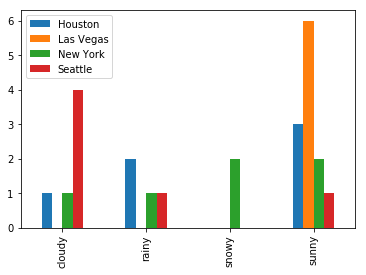

In [49]:
%matplotlib inline
weather.apply(pd.value_counts).plot(kind='bar')

**Case 2**: Using `apply` with the Series accessors `str`, `dt` and `cat`

Pandas Series, depending on their data type, can access additional Series-only methods through **`str`**, **`dt`** and **`cat`** for string, datetime and categorical type columns.

In [50]:
weather.Houston.str.capitalize()

0     Rainy
1     Sunny
2     Sunny
3    Cloudy
4     Rainy
5     Sunny
Name: Houston, dtype: object

Since this method exists only for Series, you can use **`apply`** here to capitalize each column.

In [51]:
weather.apply(lambda x: x.str.capitalize())

,Houston,Las Vegas,New York,Seattle
0,Rainy,Sunny,Sunny,Sunny
1,Sunny,Sunny,Sunny,Cloudy
2,Sunny,Sunny,Snowy,Cloudy
3,Cloudy,Sunny,Snowy,Cloudy
4,Rainy,Sunny,Rainy,Cloudy
5,Sunny,Sunny,Cloudy,Rainy


This is one case where you can use the **`applymap`** method by directly using the string method on each value.

In [52]:
weather.applymap(str.capitalize)

,Houston,Las Vegas,New York,Seattle
0,Rainy,Sunny,Sunny,Sunny
1,Sunny,Sunny,Sunny,Cloudy
2,Sunny,Sunny,Snowy,Cloudy
3,Cloudy,Sunny,Snowy,Cloudy
4,Rainy,Sunny,Rainy,Cloudy
5,Sunny,Sunny,Cloudy,Rainy


In [56]:
employee = pd.read_csv('data/employee.csv')
employee.head()

,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,HIRE_DATE,JOB_DATE
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,1989-06-19,1994-10-22


Select just the titles and departments 

In [57]:
emp_title_dept = employee[['DEPARTMENT', 'POSITION_TITLE']]
emp_title_dept.head()

,DEPARTMENT,POSITION_TITLE
0,Municipal Courts Department,ASSISTANT DIRECTOR (EX LVL)
1,Library,LIBRARY ASSISTANT
2,Houston Police Department-HPD,POLICE OFFICER
3,Houston Fire Department (HFD),ENGINEER/OPERATOR
4,General Services Department,ELECTRICIAN


Let's find all the departments and titles that contain the word 'police'.

In [58]:
has_police = emp_title_dept.apply(lambda x: x.str.upper().str.contains('POLICE'))
has_police.head()

,DEPARTMENT,POSITION_TITLE
0,False,False
1,False,False
2,True,True
3,False,False
4,False,False


Let's use these boolean values to only select rows that have both values as **`True`**.

In [59]:
emp_title_dept[has_police.all(axis='columns')].head(10)

,DEPARTMENT,POSITION_TITLE
2,Houston Police Department-HPD,POLICE OFFICER
5,Houston Police Department-HPD,SENIOR POLICE OFFICER
14,Houston Police Department-HPD,POLICE SERGEANT
15,Houston Police Department-HPD,SENIOR POLICE OFFICER
16,Houston Police Department-HPD,SENIOR POLICE OFFICER
17,Houston Police Department-HPD,POLICE SERGEANT
19,Houston Police Department-HPD,SENIOR POLICE OFFICER
24,Houston Police Department-HPD,POLICE OFFICER
25,Houston Police Department-HPD,SENIOR POLICE OFFICER
26,Houston Police Department-HPD,SENIOR POLICE OFFICER


### How fast are the `str` accessor methods?
Not any faster than looping...

In [60]:
%timeit employee['POSITION_TITLE'].str.upper()

898 µs ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
%timeit employee['POSITION_TITLE'].apply(str.upper)

662 µs ± 40.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [62]:
%timeit pd.Series([x.upper() for x in employee['POSITION_TITLE']])

549 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
%timeit employee['POSITION_TITLE'].max()

309 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [64]:
%timeit employee['BASE_SALARY'].max()

88 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [65]:
%timeit employee['POSITION_TITLE'].values.max()

109 µs ± 432 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [66]:
%timeit employee['BASE_SALARY'].values.max()

8.78 µs ± 546 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [67]:
a_list = employee['POSITION_TITLE'].tolist()

In [68]:
%timeit max(a_list)

102 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Exercise
<span style="color:green; font-size:16px">The following example is from the documentation. Produce the same result without using apply by creating a function that it accepts a DataFrame and returns a DataFrame</span>

In [69]:
df = pd.DataFrame(np.random.randint(0, 20, (10, 4)), 
                  columns=['x1', 'y1', 'x2', 'y2'])
df.head()

,x1,y1,x2,y2
0,5,10,12,12
1,17,10,18,8
2,11,7,8,15
3,2,5,10,11
4,7,7,4,3


In [70]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [71]:
df.apply(subtract_and_divide, args=(5,), divide=3)

,x1,y1,x2,y2
0,0.000000,1.666667,2.333333,2.333333
1,4.000000,1.666667,4.333333,1.000000
2,2.000000,0.666667,1.000000,3.333333
3,-1.000000,0.000000,1.666667,2.000000
4,0.666667,0.666667,-0.333333,-0.666667
5,1.000000,-1.333333,2.666667,4.000000
6,2.000000,-0.666667,-0.333333,2.000000
7,4.333333,0.333333,1.666667,3.000000
8,-0.666667,0.000000,3.666667,1.333333
9,-1.000000,1.333333,2.000000,1.666667


In [73]:
# your code here
def subtract_and_divide_v2(x, sub, divide=1):
    return (x - sub) / divide
subtract_and_divide_v2(df, 5, divide=3)

,x1,y1,x2,y2
0,0.000000,1.666667,2.333333,2.333333
1,4.000000,1.666667,4.333333,1.000000
2,2.000000,0.666667,1.000000,3.333333
3,-1.000000,0.000000,1.666667,2.000000
4,0.666667,0.666667,-0.333333,-0.666667
5,1.000000,-1.333333,2.666667,4.000000
6,2.000000,-0.666667,-0.333333,2.000000
7,4.333333,0.333333,1.666667,3.000000
8,-0.666667,0.000000,3.666667,1.333333
9,-1.000000,1.333333,2.000000,1.666667


### Exercise
<span style="color:green; font-size:16px">Make the following idiomatic:</span>

In [74]:
college = pd.read_csv('data/college.csv', 
                      usecols=lambda x: 'UGDS' in x or x == 'INSTNM', 
                      index_col='INSTNM')
college = college.dropna()
college.shape

(6874, 10)

In [75]:
college.head()

,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,,
Alabama A & M University,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [76]:
def max_race_count(s):
    max_race_pct = s.iloc[1:].max()
    return (max_race_pct * s.loc['UGDS']).astype(int)

In [77]:
college.apply(max_race_count, axis=1).head()

INSTNM
Alabama A & M University               3933
University of Alabama at Birmingham    6741
Amridge University                      121
University of Alabama in Huntsville    3809
Alabama State University               4429
dtype: int64

In [80]:
# your code here
(college['UGDS']*(college.iloc[:, 1:].max(axis=1))).astype(int).head()

INSTNM
Alabama A & M University               3933
University of Alabama at Birmingham    6741
Amridge University                      121
University of Alabama in Huntsville    3809
Alabama State University               4429
dtype: int64

# Tips for debugging `apply`
It is more difficult to debug code that uses **`apply`** when you have a custom function. This is because **all the code in your custom function gets executed at once. You aren't stepping through the code one line at a time and checking the output**.

### Using the `display` IPython function and print statements to inspect custom function
Let's say you didn't know what **`apply`** with **`axis='columns'`** was implicitly passing to the custom function.

In [81]:
# what the hell is x?
def func(x):
    return 1

In [82]:
college.apply(func, axis=1).head()

INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    1
Amridge University                     1
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

Its obvious that you need to know what object **`x`** is in **`func`**. One thing we can do is print out its type. To stop the output we can force an error by calling **`raise`**.

In [83]:
# what the hell is x?
def func(x):
    print(type(x))
    raise
    return 1

college.apply(func, axis=1).head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


RuntimeError: ('No active exception to reraise', 'occurred at index Alabama A & M University')

Ok, great. We know that **`x`** is a Series. Why did it get printed twice? It turns out that **`pandas` calls your method twice on the first row/column to determine if it can take a fast path or not**. This is a small implementation detail that shouldn't affect you unless your function is making references to variables out of scope.

Let's go one step further and display **`x`** on the screen

In [84]:
from IPython.display import display

In [85]:
# what the hell is x?
def func(x):
    display(x)
    raise
    return 1

college.apply(func, axis=1).head()

UGDS          4206.0000
UGDS_WHITE       0.0333
UGDS_BLACK       0.9353
UGDS_HISP        0.0055
UGDS_ASIAN       0.0019
UGDS_AIAN        0.0024
UGDS_NHPI        0.0019
UGDS_2MOR        0.0000
UGDS_NRA         0.0059
UGDS_UNKN        0.0138
Name: Alabama A & M University, dtype: float64

UGDS          4206.0000
UGDS_WHITE       0.0333
UGDS_BLACK       0.9353
UGDS_HISP        0.0055
UGDS_ASIAN       0.0019
UGDS_AIAN        0.0024
UGDS_NHPI        0.0019
UGDS_2MOR        0.0000
UGDS_NRA         0.0059
UGDS_UNKN        0.0138
Name: Alabama A & M University, dtype: float64

RuntimeError: ('No active exception to reraise', 'occurred at index Alabama A & M University')

### Exercise 1
<span style="color:green; font-size:16px">Use the **`display`** function after each line in a custom function that gets used with **`apply`** and **`axis='columns'`** to find the population of the second highest race per school. Make sure you raise an exception or else you will have to kill your kernel because of the massive output.</span>

In [ ]:
# your code here

### Exercise 2 - Very difficult
<span style="color:green; font-size:16px">Can you do this without using **`apply`**?</span>

In [ ]:
# your code here

### Exercise 3
<span style="color:green; font-size:16px">When **`apply`** is called on a Series, what is the data type that gets passed to the function?</span>

In [ ]:
# your code here

# Summary
* **`map`** is a Series method. I suggest using by passing it a dictionary/Series and NOT a function
* Use **`apply`** when you want to apply a function to each value of a Series or each row/column of a DataFrame
* You rarely need **`apply`** - Use only pandas and numpy functions first
* Using **`apply`** on a DataFrame with **`axis='columns'`** is the slowest operation in pandas
* You can use **`apply`** on a DataFrame when you need to call a method that is available only to Series (like **`value_counts`**)
* Debug apply by printing and using the **`display`** IPython function inside your custom function